In [ ]:
#
# Modern modeling ~ iris_modeler:  All-in-one iris clasification via nearest neighbors


## Here's our _one-cell_ version of the ML workflow <font color="Coral"><b>let's start here</b></font> &nbsp;&nbsp; <font size="-2">"amoeba version," maybe</font>

This is for iris classification.  You'll run ML on the births and digits!


### <b>Data reminder</b>

In Colab, be sure to upload your <tt>.csv</tt> cleaned data file.

For example, to run the cell below you will need the <tt>iris_cleaned.csv</tt> file -- it's [here](https://drive.google.com/drive/folders/1Qnie8N2VCdumwaFxFldJ_1iQmvtb40pZ?usp=drive_link)

Download it to your machine and then upload it to Colab into the _folder_ &nbsp; icon at left.

### Iris classification via Nearest Neighbors

+ Section 1: Libraries
+ Section 2: Read the already-cleaned data  (+ view, if you wish)
+ Section 3:  Drop any columns we don't want to use
+ Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
+ Section 5:  convert from pandas (spreadsheet) to numpy (array)
+ Section 6:  define our features (X_all) and our target-to-predict (y_all)
+ Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
+ Section 8:  Here's where the model-building happens!  First, we guess at the parameters (k=84)
+ Section 9:  Let's see how our model does on the TEST data...
+ Section 10:  Let's cross-validate to find the "best" value of k, best_k
+ Section 11:  Let's build a final model + and see it!

In [ ]:
# Section 1:  Libraries
#
import sklearn          # if not present, use a variant of  !pip3 install -U scikit-learn
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

# Section 2:  Read the already-cleaned data  (+ view, if you wish)
#
cleaned_filename = "iris_cleaned.csv"     # data should be "tidy" already...
df_tidy = pd.read_csv(cleaned_filename)   # can add encoding="utf-8" if needed
if False:
    print(f"{cleaned_filename} : file read into a pandas dataframe.")
    print("df_tidy is\n", df_tidy)
    print("df_tidy.info() is"); df_tidy.info()

# Section 3:  Drop any columns we don't want to use
ROW = 0
COLUMN = 1
df_model1 = df_tidy.drop('irisname', axis=COLUMN )
if False:  print("df_model1 is\n", df_model1)

# Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
COLUMNS = df_model1.columns                     # int to str
SPECIES = ['setosa','versicolor','virginica']   # int to str
SPECIES_INDEX = { s:i for i,s in enumerate(SPECIES) }  # str to int   {'setosa':0,'versicolor':1,'virginica':2}
COLUMNS_INDEX = { c:i for i,c in enumerate(COLUMNS) }  # str to int   {'sepallen':0,'sepalwid':1,'petallen':2, <more> }
if False:  print(f"{COLUMNS = } \n {COLUMNS_INDEX = } \n {SPECIES = } \n {SPECIES_INDEX = }")

# Section 5:  convert from pandas (spreadsheet) to numpy (array)
A = df_model1.to_numpy()    # yields the underlying numpy array
A = A.astype('float64')     # make sure everything is floating-point
NUM_ROWS, NUM_COLS = A.shape   # let's have NUM_ROWS and NUM_COLS around
if False:  print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# Section 6:  define our features (X_all) and our target-to-predict (y_all)
X_all = A[:,0:4]  # X (features) WATCH OUT! This is likely to change from model to model...
y_all = A[:,4]    # y (labels) WATCH OUT! This is likely to change from model to model...
if False:
    print(f"The labels/species are \n {y_all} \n ");
    print(f"The first few data rows are \n {X_all[0:5,:]}")

# Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
from sklearn.model_selection import train_test_split      # this function splits into training + testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)  # random_state=42 # 20% testing
if False:
    print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )
    print(f"Held-out testing data... (testing data: {len(y_test)} rows)")
    print(f"y_test: {y_test}")
    print(f"X_test (first few rows): {X_test[0:5,:]}\n")
    print(f"Training Data used for modeling... (training data: {len(y_train)} rows)")
    print(f"y_train: {y_train}")
    print(f"X_train (first few rows): {X_train[0:5,:]}")  # 5 rows

# Section 8:  Here's where the model-building happens!  First, we guess at the parameters (k=84)
from sklearn.neighbors import KNeighborsClassifier
k = 84   # we don't know what k to use, so we guess!  (this will _not_ be a good value)
knn_model = KNeighborsClassifier(n_neighbors=k)       # here, k is the "k" in kNN
knn_model.fit(X_train, y_train)      # we train the model ... it's one line!
if False:  print("Created and trained a knn classifier with k =", k)

# Section 9:  Let's see how our naive model does on the TEST data!
predicted_labels = knn_model.predict(X_test)      # THIS IS THE KEY LINE:  predict
actual_labels = y_test
if True:
    print("Predicted labels:", predicted_labels)
    print("Actual  labels  :", actual_labels)
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set:  {num_correct} correct out of {total} total, for {num_correct*100/total:5.2f}%\n")

# Section 10:  Let's cross-validate to find the "best" value of k, best_k:
import time
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_k = 84  # Not correct!
best_accuracy = 0.0  # also not correct...
for k in range(1,85):    # Note that we are cross-validating using only our TRAINING data!
    knn_cv_model = KNeighborsClassifier(n_neighbors=k)   # build a knn_model for every k
    cv_scores = cross_val_score( knn_cv_model, X_train, y_train, cv=5 )  # cv=5 means 80/20
    this_cv_accuracy = cv_scores.mean()               # mean() is numpy's built-in average function
    if False: print(f"k: {k:2d}  cv accuracy: {this_cv_accuracy:7.4f}")
    if this_cv_accuracy > best_accuracy:  # is this one better?
        best_accuracy = this_cv_accuracy  # track the best accuracy
        best_k = k                        # with the best k
    all_accuracies.append(this_cv_accuracy)
    time.sleep(0.002)   # dramatic pauses!
if True: print(f"best_k = {best_k}  \n    yields the highest cv accuracy: {100*best_accuracy:5.2f}%")  # print the best one

# Section 11:  Here's where the model-building happens with the best-found parameters:
knn_model_final = KNeighborsClassifier(n_neighbors=best_k)
knn_model_final.fit(X_all, y_all)      # we train the model ... on _all_ the data!
if True:  print("\nCreated and trained a classifier named knn_model_final with best_k =", best_k)


Predicted labels: [2. 2. 1. 1. 2. 1. 1. 2. 1. 2. 2. 1. 1. 2. 2. 1. 2. 1. 2. 1. 1. 1. 2. 2.
 2. 1. 1. 1. 1.]
Actual  labels  : [1. 2. 0. 0. 2. 0. 0. 1. 0. 2. 2. 1. 1. 2. 1. 1. 2. 0. 1. 0. 0. 0. 2. 2.
 2. 0. 0. 1. 1.]

Results on test set:  14 correct out of 29 total, for 48.28%

best_k = 11  
    yields the highest cv accuracy: 98.26%

Created and trained a classifier named knn_model_final with best_k = 11


### Optional:  Let's format things more carefully...

In [ ]:
#
# Let's print things in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0

    print()
    print(f'row {"#":>3s} : {"predicted":>12s} {"actual":<12s}   {"result"}')

    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {SPECIES[p]:>12s} {SPECIES[a]:<12s}   {result}")

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out!
print("The UNTUNED model results (not the final model):")
compare_labels(predicted_labels,actual_labels)

The UNTUNED model results (not the final model):

row   # :    predicted actual         result
row   0 :    virginica versicolor     incorrect
row   1 :    virginica virginica      
row   2 :   versicolor setosa         incorrect
row   3 :   versicolor setosa         incorrect
row   4 :    virginica virginica      
row   5 :   versicolor setosa         incorrect
row   6 :   versicolor setosa         incorrect
row   7 :    virginica versicolor     incorrect
row   8 :   versicolor setosa         incorrect
row   9 :    virginica virginica      
row  10 :    virginica virginica      
row  11 :   versicolor versicolor     
row  12 :   versicolor versicolor     
row  13 :    virginica virginica      
row  14 :    virginica versicolor     incorrect
row  15 :   versicolor versicolor     
row  16 :    virginica virginica      
row  17 :   versicolor setosa         incorrect
row  18 :    virginica versicolor     incorrect
row  19 :   versicolor setosa         incorrect
row  20 :   versicolor set

14

### <b><font color="DodgerBlue">We did it!</font></b>: &nbsp; Now, let's use the predictive model!

We can use the predictive model to make predictions and try it out!

In [ ]:
#
# Ok!  We have our knn model, let's use it...
#
# ... in a data-trained predictive model (k-nearest-neighbors), using scikit-learn
#
# warning: this model has NOT yet been tuned to its "best k"
#
def predictive_model( Features ):
    """ input: a list of four features
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                      # extra brackets needed so it's 2d
    predicted_species_list = knn_model_final.predict(our_features)   # PREDICT!

    predicted_species = int(round(predicted_species_list[0]))  # unpack the one element it contains
    name = SPECIES[predicted_species]                          # look up the species
    return name

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
ListofFeatures = [ [6.7,3.3,5.7,2.1],
                   [5.8,2.7,4.1,1.0],
                   [4.6,3.6,3.0,2.2],
                   [6.7,3.3,5.7,2.1],
                   [4.2,4.2,4.2,4.2],
                   [1,42,4.7,3.01],        # -4.7? .01?  0?
                   ]

for Features in ListofFeatures:
    result = predictive_model( Features )
    print(f"From the Features {Features}, I predict {result}")

From the Features [6.7, 3.3, 5.7, 2.1], I predict virginica
From the Features [5.8, 2.7, 4.1, 1.0], I predict versicolor
From the Features [4.6, 3.6, 3.0, 2.2], I predict versicolor
From the Features [6.7, 3.3, 5.7, 2.1], I predict virginica
From the Features [4.2, 4.2, 4.2, 4.2], I predict virginica
From the Features [1, 42, 4.7, 3.01], I predict setosa


### This feels like an excuse to plot with seaborn...

<Axes: xlabel='k_value', ylabel='accuracy'>

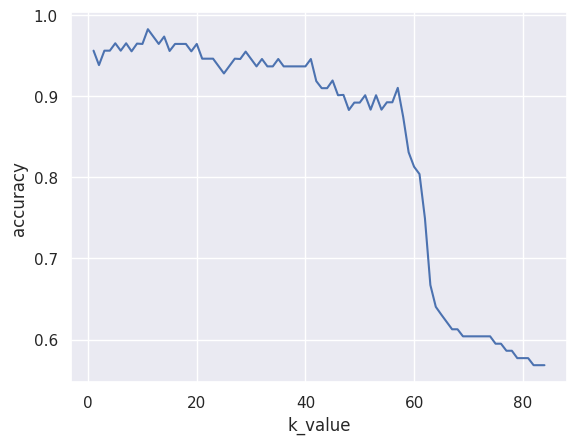

In [ ]:
### Let's see all the accuracies!

import pandas as pd
# Let's create a pandas dataframe out of the above cell's data
crossvalidation_df = pd.DataFrame( {"k_value":np.asarray(range(1,84+1)),
                                    "accuracy":np.asarray(all_accuracies)}
                                    )

import seaborn as sns
sns.set_theme(style="darkgrid")
# Plot the responses for different events and regions
sns.lineplot(x="k_value", y="accuracy",  #  hue="region", style="event",
             data=crossvalidation_df)

### Let's use the "correct value" of k

It will not always be the same, because cross-validation is randomized...

### We're ready to deploy our "final + best" predictive model!

In [ ]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features, Model ):                 # to allow the input of any Model
    """ input: a list of four features
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed for 2d
    predicted_species = Model.predict(our_features)       # The model's prediction!
    predicted_species = int(round(predicted_species[0]))  # unpack the extra brackets
    return predicted_species

#
# Try it!
#

LoF = [
[4.8, 3.1, 1.6, 0.2 ],   # actually setosa
[5.7, 2.9, 4.2, 1.3 ],   # actually versicolor
[5.8, 2.7, 5.1, 1.9 ],   # actually virginica
[5.2, 4.1, 1.5, 0.1 ],   # actually setosa
[5.4, 3.4, 1.5, 0.4 ],   # actually setosa
[5.1, 2.5, 3.0, 1.1 ],   # actually versicolor
[6.2, 2.9, 4.3, 1.3 ],   # actually versicolor
[6.3, 3.3, 6.0, 2.5 ],   # actually virginica
[5.7, 2.8, 4.1, 1.3 ],   # actually virginica  <-- almost always wrong!

[0.0,0.0,0.0,0.0],               # used as a separator here

[3.7, 2.8, 2.1, 0.3 ],   # let's use this for our own "new" iris ...
]

# run on each one:
for Features in LoF:
    predicted_species = predictive_model( Features, knn_model_final )  # pass in the model, too!
    name = SPECIES[predicted_species]
    print(f"from the features {Features} I predict {name} ")    # Answers in the assignment...

from the features [4.8, 3.1, 1.6, 0.2] I predict setosa 
from the features [5.7, 2.9, 4.2, 1.3] I predict versicolor 
from the features [5.8, 2.7, 5.1, 1.9] I predict virginica 
from the features [5.2, 4.1, 1.5, 0.1] I predict setosa 
from the features [5.4, 3.4, 1.5, 0.4] I predict setosa 
from the features [5.1, 2.5, 3.0, 1.1] I predict versicolor 
from the features [6.2, 2.9, 4.3, 1.3] I predict versicolor 
from the features [6.3, 3.3, 6.0, 2.5] I predict virginica 
from the features [5.7, 2.8, 4.1, 1.3] I predict versicolor 
from the features [0.0, 0.0, 0.0, 0.0] I predict setosa 
from the features [3.7, 2.8, 2.1, 0.3] I predict setosa 


### Predictive models aren't perfect!
+ Notice that the last prediction above the [0,0,0,0] is (probably) wrong
  + It probably predicted _versicolor_, but it was actually a _virginica_
  + In essence, it was a _virginica_ iris that "looked more like" a _versicolor_ ... ***from these four features!***
  + A botanist would use more than these four features to classify difference species...

+ **Key**: Even when the modeling process runs "perfectly," the models are likely to be imperfect...
+ ... it's just that we won't know where the imperfections are -- until future observations arrive!

In [ ]:
#
# That's it!  Welcome to the world of model-building workflows!!
#
#             Our prediction?  We'll be back for more ML!
#
# In fact, the rest of the hw is to run more ML workflows:
# Births, Digits, another dataset, which could be Titanic, Housing, ...
#
# and more ML algorithms:
# Decision Trees, Random Forests, Neural Nets
# and, optionally, time series, recommendation systems, ...

### That's it! Our model is complete...

... not perfect, but **complete**

What does this mean?

It means that the model -- the function (above) -- is ***already*** prepared to provide an output for every possible input!

We can see this in a plot of the outputs for every input in the "sepal" plane (length vs. width) as well as the "petal" plane:

In [ ]:
# we can only plot 2 dimensions at a time!
# These two will be our constants:
sepallen = 5.0
sepalwid = 3.0
# petallen =
# petalwid =

VERTICAL = np.arange(0,8,.1) # array of vertical input values
HORIZONT = np.arange(0,8,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array
MODEL = knn_model_final


col = 0
row = 0
for petallen in VERTICAL: # for every sepal length
  for petalwid in HORIZONT: # for every sepal width
    Features = [ sepallen, sepalwid, petallen, petalwid ]
    output = predictive_model(Features,MODEL)
    #print(f"Input {Features} Output: {output}")
    PLANE[row,col] = output
    row += 1
  row = 0
  col += 1
  print(".", end="")  # so we know it's running
  if col % 42 == 0: print() # same...

print("\n", PLANE[0:3,0:3]) # small bit of the lower-left corner

..........................................
......................................
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


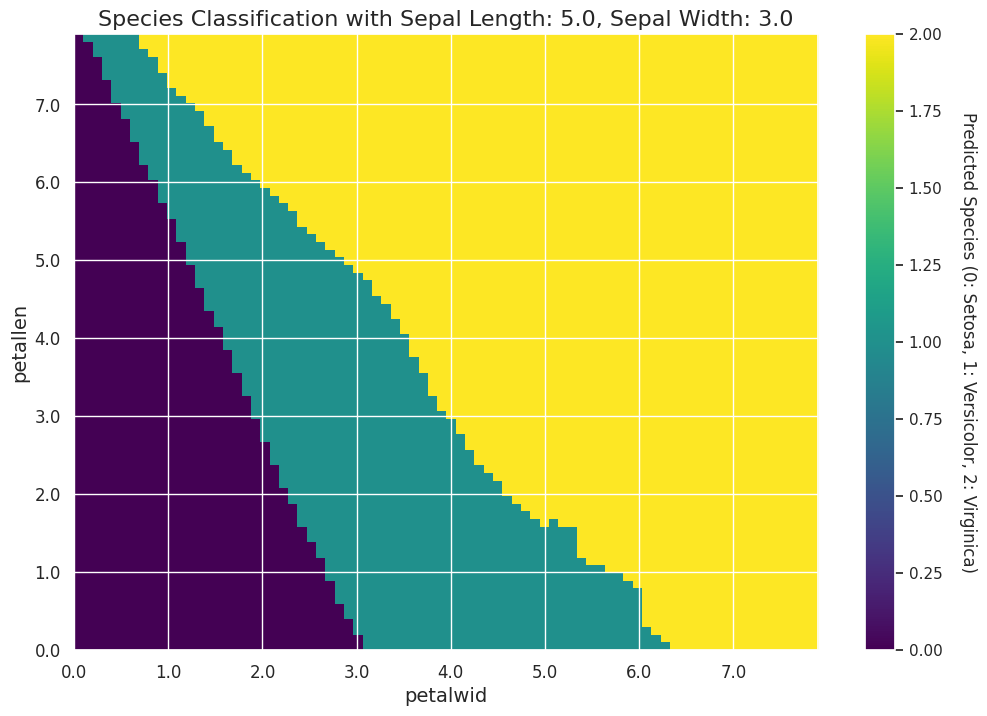

Remember our species-to-number mapping:
0 - setosa
1 - versicolor
2 - virginica


In [ ]:
# Assuming 'PLANE', 'VERTICAL', and 'HORIZONT' are defined as in the original code

# Create a new figure and axes
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))

# Create the heatmap
im = ax.imshow(PLANE, cmap="viridis", extent=[HORIZONT.min(), HORIZONT.max(), VERTICAL.min(), VERTICAL.max()], origin="lower", aspect="auto")

# Set axis labels and ticks
ax.set_xlabel("petalwid", fontsize=14)
ax.set_ylabel("petallen", fontsize=14)

# Calculate the indices for reduced ticks and labels
reduced_tick_indices = np.arange(0, len(HORIZONT), len(HORIZONT)//8)
# Ensure that the last index is included
# if reduced_tick_indices[-1] != len(HORIZONT)-1:
#   reduced_tick_indices = np.append(reduced_tick_indices, len(HORIZONT)-1)


# Set ticks and tick labels with correct values
ax.set_xticks(HORIZONT[reduced_tick_indices]) # Display ticks every 0.4 unit
ax.set_yticks(VERTICAL[reduced_tick_indices])
ax.set_xticklabels([f"{x:.1f}" for x in HORIZONT[reduced_tick_indices]], fontsize=12)  # Format x-axis labels
ax.set_yticklabels([f"{y:.1f}" for y in VERTICAL[reduced_tick_indices]], fontsize=12)  # Format y-axis labels


# Add a colorbar
cbar = plt.colorbar(im)
cbar.set_label('Predicted Species (0: Setosa, 1: Versicolor, 2: Virginica)', rotation=270, labelpad=25)

# Set the title
ax.set_title(f"Species Classification with Sepal Length: {sepallen}, Sepal Width: {sepalwid}", fontsize=16)

plt.show()

print("Remember our species-to-number mapping:")
print("0 - setosa")
print("1 - versicolor")
print("2 - virginica")

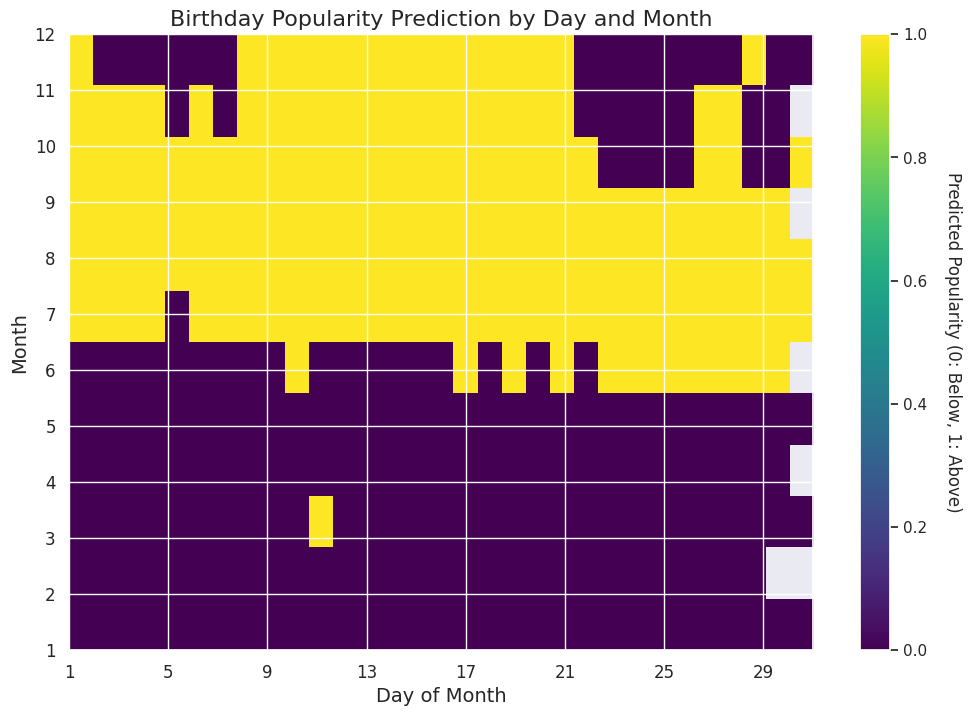

0 - below average
1 - above average


In [ ]:
# Assuming 'PLANE', 'DAYS', and 'MONTHS' are defined in the previous step

# Create the heatmap plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))

# Show the PLANE data as an image (heatmap)
im = ax.imshow(PLANE, cmap="viridis",
               extent=[DAYS.min(), DAYS.max(), MONTHS.min(), MONTHS.max()],
               origin="lower", aspect="auto")

# Set axis labels
ax.set_xlabel("Day of Month", fontsize=14)
ax.set_ylabel("Month", fontsize=14)

# Show ticks at every 4 days and 1 month
day_ticks = np.arange(1, 32, 4)
month_ticks = np.arange(1, 13, 1)

ax.set_xticks(day_ticks)
ax.set_yticks(month_ticks)

# Format tick labels
ax.set_xticklabels([str(d) for d in day_ticks], fontsize=12)
ax.set_yticklabels([str(m) for m in month_ticks], fontsize=12)

# Add a colorbar to explain the values
cbar = plt.colorbar(im)
cbar.set_label('Predicted Popularity (0: Below, 1: Above)', rotation=270, labelpad=25)

# Add a title
ax.set_title("Birthday Popularity Prediction by Day and Month", fontsize=16)

# Show the final plot
plt.show()

# Reminder of category mapping
print("0 - below average")
print("1 - above average")


We've done it!

Remember that the model _thinks_ it knows everything...

But it's way too confident! &nbsp;&nbsp; (This seems like an AI theme...)

# Your tasks!

Based on the examples above, your task is to build a kNN model (along with the tests and visualizations) for two datasets:

*   the births dataset and
*   the digits dataset

<br>
<hr>
<br>

Suggestion:  Perhaps open this notebook twice...

_Then you can copy-paste-adapt the iris workflow to each new dataset!_

<br>
<hr>
<br>

As optional EC, track down another dataset of your own choosing and build a DT+RF model  

Notice that this can be an excellent final project, too! 😃

### Births classification via Nearest Neighbors


In [ ]:
# Section 1:  Libraries
#
import sklearn          # if not present, use a variant of  !pip3 install -U scikit-learn
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

# Section 2:  Read the already-cleaned data  (+ view, if you wish)
#
cleaned_filename = "births_cleaned.csv"
#data should be "tidy" already...
df_tidy = pd.read_csv(cleaned_filename)               # can add encoding="utf-8" if needed
if False:
    print(f"{cleaned_filename} : file read into a pandas dataframe.")
    print("df_tidy is\n", df_tidy)
    print("df_tidy.info() is"); df_tidy.info()

# Section 3:  Drop any columns we don't want to use
ROW = 0
COLUMN = 1
df_model1 = df_tidy.drop(['births', 'popularitystring'], axis=COLUMN )
if False:  print("df_model1 is\n", df_model1)

# Section 4:  create COLUMNS and TARGET variables to show we're organized + know what's happening...
COLUMNS = df_model1.columns.drop('popularitynum')                     # input features only
TARGET = 'popularitynum'                                              # output target
COLUMNS_INDEX = { c:i for i,c in enumerate(COLUMNS) }                 # str to int index for features
if False:  print(f"{COLUMNS = } \n {COLUMNS_INDEX = } \n {TARGET = }")

# Section 5:  convert from pandas (spreadsheet) to numpy (array)
A = df_model1.to_numpy()    # yields the underlying numpy array
A = A.astype('float64')     # make sure everything is floating-point
NUM_ROWS, NUM_COLS = A.shape   # let's have NUM_ROWS and NUM_COLS around
if False:  print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# Section 6:  define our features (X_all) and our target-to-predict (y_all)
X_all = A[:,0:2]  # X (features): month, day
y_all = A[:,2]    # y (label): popularitynum
if False:
    print(f"The labels are \n {y_all} \n ");
    print(f"The first few data rows are \n {X_all[0:5,:]}")

# Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
from sklearn.model_selection import train_test_split      # this function splits into training + testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)  # random_state=42 # 20% testing
if False:
    print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )
    print(f"Held-out testing data... (testing data: {len(y_test)} rows)")
    print(f"y_test: {y_test}")
    print(f"X_test (first few rows): {X_test[0:5,:]}\n")
    print(f"Training Data used for modeling... (training data: {len(y_train)} rows)")
    print(f"y_train: {y_train}")
    print(f"X_train (first few rows): {X_train[0:5,:]}")  # 5 rows

# Section 8:  Here's where the model-building happens!  First, we guess at the parameters (k=25)
from sklearn.neighbors import KNeighborsClassifier
k = 25   # we don't know what k to use, so we guess!  (this will _not_ be a good value)
knn_model = KNeighborsClassifier(n_neighbors=k)       # here, k is the "k" in kNN
knn_model.fit(X_train, y_train)      # we train the model ... it's one line!
if False:  print("Created and trained a knn classifier with k =", k)

# Section 9:  Let's see how our naive model does on the TEST data!
predicted_labels = knn_model.predict(X_test)      # THIS IS THE KEY LINE:  predict
actual_labels = y_test
if True:
    print("Predicted labels:", predicted_labels)
    print("Actual  labels  :", actual_labels)
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set:  {num_correct} correct out of {total} total, for {num_correct*100/total:5.2f}%\n")

# Section 10:  Let's cross-validate to find the "best" value of k, best_k:
import time
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_k = 25  # Not correct!
best_accuracy = 0.0  # also not correct...
for k in range(1,41):    # Note that we are cross-validating using only our TRAINING data!
    knn_cv_model = KNeighborsClassifier(n_neighbors=k)   # build a knn_model for every k
    cv_scores = cross_val_score( knn_cv_model, X_train, y_train, cv=5 )  # cv=5 means 80/20
    this_cv_accuracy = cv_scores.mean()               # mean() is numpy's built-in average function
    if False: print(f"k: {k:2d}  cv accuracy: {this_cv_accuracy:7.4f}")
    if this_cv_accuracy > best_accuracy:  # is this one better?
        best_accuracy = this_cv_accuracy  # track the best accuracy
        best_k = k                        # with the best k
    all_accuracies.append(this_cv_accuracy)
    time.sleep(0.002)   # dramatic pauses!
if True: print(f"best_k = {best_k}  \n    yields the highest cv accuracy: {100*best_accuracy:5.2f}%")  # print the best one

# Section 11:  Here's where the model-building happens with the best-found parameters:
knn_model_final = KNeighborsClassifier(n_neighbors=best_k)
knn_model_final.fit(X_all, y_all)      # we train the model ... on _all_ the data!
if True:  print("\nCreated and trained a classifier named knn_model_final with best_k =", best_k)


Predicted labels: [1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 1.]
Actual  labels  : [1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 0. 1.]

Results on test set:  59 correct out of 74 total, for 79.73%

best_k = 8  
    yields the highest cv accuracy: 82.89%

Created and trained a classifier named knn_model_final with best_k = 8


In [ ]:
# We'll show predictions and actual values in a vertical table

CATEGORIES = ['below', 'above']  # 0 = below average, 1 = above average

def compare_labels(predicted_labels, actual_labels):
    """ This function compares predicted vs actual labels,
        and prints them in a clear vertical format.
    """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0

    print()
    print(f'row {"#":>3s} : {"predicted":>12s} {"actual":<12s}   {"result"}')

    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))  # prediction
        a = int(round(actual_labels[i]))     # actual label
        result = "incorrect"                 # default to "incorrect"
        if p == a:
            result = ""                      # remove "incorrect" if it's correct
            num_correct += 1                 # count correct prediction

        print(f"row {i:>3d} : {CATEGORIES[p]:>12s} {CATEGORIES[a]:<12s}   {result}")

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# Try the function using our test results (not the final model yet)
print("The UNTUNED model results (not the final model):")
compare_labels(predicted_labels, actual_labels)


The UNTUNED model results (not the final model):

row   # :    predicted actual         result
row   0 :        above above          
row   1 :        above above          
row   2 :        above above          
row   3 :        above below          incorrect
row   4 :        below below          
row   5 :        above above          
row   6 :        below below          
row   7 :        below below          
row   8 :        above below          incorrect
row   9 :        above below          incorrect
row  10 :        above below          incorrect
row  11 :        above above          
row  12 :        below below          
row  13 :        below below          
row  14 :        below below          
row  15 :        below below          
row  16 :        above above          
row  17 :        below below          
row  18 :        above above          
row  19 :        below below          
row  20 :        above above          
row  21 :        above above          
row  22 :  

60

In [ ]:
# Now, let's use the predictive model!
# We can use the trained model to make predictions using (month, day) as input

CATEGORIES = ['below', 'above']  # 0 = below average, 1 = above average

def predictive_model(Features):
    """ input: a list with two values → [month, day]
        output: predicted label from the model: 'below' or 'above'
    """
    our_features = np.asarray([Features])                     # make it 2D for prediction
    predicted_label = knn_model_final.predict(our_features)   # make prediction
    result = int(round(predicted_label[0]))                   # get the label (0 or 1)
    return CATEGORIES[result]                                 # return the text version

# Try it with example dates!
ListofDates = [
    [1, 1],   # Jan 1
    [2, 14],  # Valentine's Day
    [3, 15],  # Random date
    [7, 4],   # Independence Day
    [10, 31], # Halloween
    [12, 25], # Christmas
]

for Features in ListofDates:
    result = predictive_model(Features)
    print(f"From the date {Features}, I predict the day is: {result}")


From the date [1, 1], I predict the day is: below
From the date [2, 14], I predict the day is: below
From the date [3, 15], I predict the day is: below
From the date [7, 4], I predict the day is: above
From the date [10, 31], I predict the day is: above
From the date [12, 25], I predict the day is: below


<Axes: xlabel='k_value', ylabel='accuracy'>

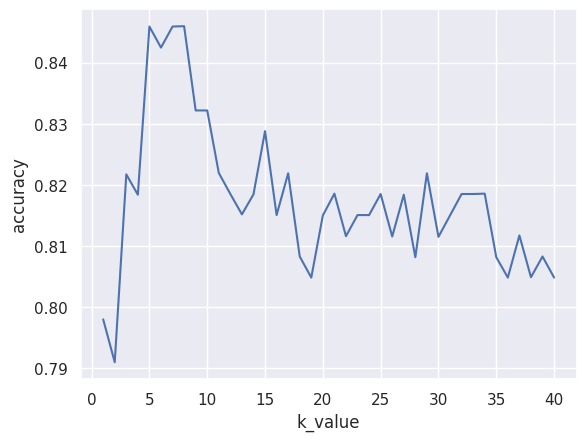

In [ ]:
### Let's see all the accuracies!

import pandas as pd
# Create a DataFrame that shows the accuracy for each k value we tested
crossvalidation_df = pd.DataFrame({
    "k_value": np.asarray(range(1, 41)),         # from k = 1 to 40
    "accuracy": np.asarray(all_accuracies)       # accuracy results we stored earlier
})

import seaborn as sns
sns.set_theme(style="darkgrid")  # nice visual style for the plot

# Plot k on the x-axis and accuracy on the y-axis
sns.lineplot(x="k_value", y="accuracy", data=crossvalidation_df)


In [ ]:
#
# Final predictive model (k-nearest-neighbor), using best k and ALL the data
#

CATEGORIES = ['below', 'above']  # 0 = below average, 1 = above average

def predictive_model(Features, Model):  # you can use any model here
    """ input: a list of two features → [month, day]
        output: the predicted category: 'below' or 'above'
    """
    our_features = np.asarray([Features])             # convert to 2D array
    predicted_label = Model.predict(our_features)     # use model to predict
    predicted_label = int(round(predicted_label[0]))  # unpack the result
    return predicted_label                            # returns 0 or 1

#
# Try it with sample birth dates
#

LoF = [
    [1, 1],    # New Year's Day
    [2, 14],   # Valentine's Day
    [3, 15],   # Random day
    [4, 22],   # Random spring day
    [5, 10],   # Random May date
    [7, 4],    # Independence Day
    [10, 31],  # Halloween
    [12, 25],  # Christmas
    [8, 8],    # Peak summer
    [9, 9]     # Early fall
]

# run the predictions
for Features in LoF:
    predicted = predictive_model(Features, knn_model_final)
    result = CATEGORIES[predicted]
    print(f"From the date {Features}, I predict the day is: {result}")


From the date [1, 1], I predict the day is: below
From the date [2, 14], I predict the day is: below
From the date [3, 15], I predict the day is: below
From the date [4, 22], I predict the day is: below
From the date [5, 10], I predict the day is: below
From the date [7, 4], I predict the day is: above
From the date [10, 31], I predict the day is: above
From the date [12, 25], I predict the day is: below
From the date [8, 8], I predict the day is: above
From the date [9, 9], I predict the day is: above


In [ ]:
# we can only plot 2 dimensions at a time!
# We'll use 'month' as the Y-axis and 'day' as the X-axis

DAYS = np.arange(1, 32)         # 1–31 days
MONTHS = np.arange(1, 13)       # 1–12 months
PLANE = np.zeros((len(MONTHS), len(DAYS)))  # prediction result array
MODEL = knn_model_final         # use the final trained model

col = 0
row = 0
for month in MONTHS:            # for each month
  for day in DAYS:              # for each day in that month
    if (month == 2 and day > 29) or (month in [4,6,9,11] and day > 30):
        PLANE[row, col] = np.nan   # invalid date
    else:
        Features = [month, day]
        output = predictive_model(Features, MODEL)
        PLANE[row, col] = output
    col += 1
  col = 0
  row += 1
  print(".", end="")  # progress
  if row % 4 == 0: print()

# Let's look at a small part of the matrix
print("\n", PLANE[0:3, 0:3])  # show top-left of the matrix


....
....
....

 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


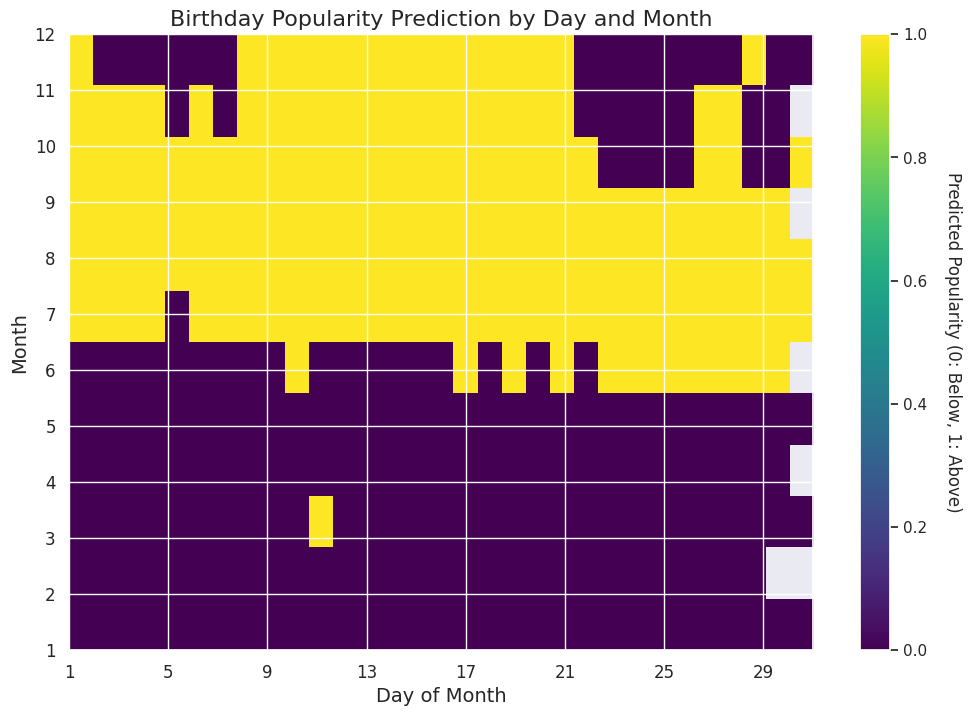

0 - below average
1 - above average


In [ ]:
# Assuming 'PLANE', 'DAYS', and 'MONTHS' are defined in the previous step

# Create the heatmap plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))

# Show the PLANE data as an image (heatmap)
im = ax.imshow(PLANE, cmap="viridis",
               extent=[DAYS.min(), DAYS.max(), MONTHS.min(), MONTHS.max()],
               origin="lower", aspect="auto")

# Set axis labels
ax.set_xlabel("Day of Month", fontsize=14)
ax.set_ylabel("Month", fontsize=14)

# Show ticks at every 4 days and 1 month
day_ticks = np.arange(1, 32, 4)
month_ticks = np.arange(1, 13, 1)

ax.set_xticks(day_ticks)
ax.set_yticks(month_ticks)

# Format tick labels
ax.set_xticklabels([str(d) for d in day_ticks], fontsize=12)
ax.set_yticklabels([str(m) for m in month_ticks], fontsize=12)

# Add a colorbar to explain the values
cbar = plt.colorbar(im)
cbar.set_label('Predicted Popularity (0: Below, 1: Above)', rotation=270, labelpad=25)

# Add a title
ax.set_title("Birthday Popularity Prediction by Day and Month", fontsize=16)

# Show the final plot
plt.show()

# Reminder of category mapping
print("0 - below average")
print("1 - above average")


### Digits classification via Nearest Neighbors

In [ ]:
# Section 1:  Libraries
#
import sklearn
import numpy as np
import pandas as pd

# Section 2:  Read the already-cleaned data  (+ view, if you wish)
#
cleaned_filename = "digits_cleaned.csv"
df_tidy = pd.read_csv(cleaned_filename)
if False:
    print(f"{cleaned_filename} : file read into a pandas dataframe.")
    print("df_tidy is\n", df_tidy)
    print("df_tidy.info() is"); df_tidy.info()

# Section 3:  Drop any columns we don't want to use
ROW = 0
COLUMN = 1
df_model1 = df_tidy.copy()  # no drop needed, all columns are useful
if False:  print("df_model1 is\n", df_model1)

# Section 4:  create COLUMNS and LABELS variables to show we're organized + know what's happening...
COLUMNS = df_model1.columns.drop('actual_digit')            # input features
LABELS = list(sorted(df_model1['actual_digit'].unique()))   # digit labels: 0–9
COLUMNS_INDEX = { c:i for i,c in enumerate(COLUMNS) }
if False:  print(f"{COLUMNS = } \n {COLUMNS_INDEX = } \n {LABELS = }")

# Section 5:  convert from pandas (spreadsheet) to numpy (array)
A = df_model1.to_numpy()
A = A.astype('float64')     # use float format
NUM_ROWS, NUM_COLS = A.shape
if False:  print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# Section 6:  define our features (X_all) and our target-to-predict (y_all)
X_all = A[:, 0:64]   # 64 features
y_all = A[:, 64]     # target: actual digit
if False:
    print(f"The labels are \n {y_all} \n ")
    print(f"The first few data rows are \n {X_all[0:5,:]}")

# Section 7:  split into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)
if False:
    print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows")
    print(f"X_train (first few rows): {X_train[0:5,:]}")

# Section 8:  First try (guess k=25)
from sklearn.neighbors import KNeighborsClassifier
k = 25
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)
if False: print("Created and trained a knn classifier with k =", k)

# Section 9:  See how our model does on the test set!
predicted_labels = knn_model.predict(X_test)
actual_labels = y_test
if True:
    print("Predicted labels:", predicted_labels)
    print("Actual  labels  :", actual_labels)
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set:  {num_correct} correct out of {total} total, for {num_correct*100/total:5.2f}%\n")

# Section 10:  Cross-validation to find best_k
import time
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_k = 25
best_accuracy = 0.0
for k in range(1, 11):  # keep it small to avoid long run
    knn_cv_model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_cv_model, X_train, y_train, cv=5, n_jobs=-1)
    this_cv_accuracy = cv_scores.mean()
    if False: print(f"k: {k:2d}  cv accuracy: {this_cv_accuracy:7.4f}")
    if this_cv_accuracy > best_accuracy:
        best_accuracy = this_cv_accuracy
        best_k = k
    all_accuracies.append(this_cv_accuracy)
    time.sleep(0.002)
if True: print(f"best_k = {best_k}  \n    yields the highest cv accuracy: {100*best_accuracy:5.2f}%")

# Section 11:  Final model with best_k
knn_model_final = KNeighborsClassifier(n_neighbors=best_k)
knn_model_final.fit(X_all, y_all)
if True: print("\nCreated and trained a classifier named knn_model_final with best_k =", best_k)


Predicted labels: [4. 0. 9. 6. 0. 5. 8. 7. 3. 6. 0. 9. 0. 2. 2. 8. 8. 4. 3. 9. 7. 2. 1. 0.
 6. 5. 4. 9. 8. 8. 6. 8. 7. 7. 0. 7. 0. 0. 4. 1. 4. 0. 9. 5. 5. 7. 5. 2.
 9. 8. 0. 5. 1. 3. 1. 2. 4. 0. 7. 2. 1. 5. 5. 7. 2. 9. 0. 5. 2. 8. 2. 3.
 1. 1. 2. 3. 7. 8. 1. 1. 3. 6. 1. 4. 4. 8. 7. 4. 2. 6. 0. 2. 7. 4. 0. 3.
 4. 7. 0. 1. 1. 7. 1. 8. 1. 6. 6. 6. 8. 3. 9. 7. 7. 2. 4. 4. 1. 3. 5. 7.
 1. 6. 2. 4. 3. 0. 9. 6. 7. 8. 7. 7. 3. 8. 6. 4. 8. 9. 3. 3. 7. 0. 7. 4.
 6. 9. 0. 8. 5. 1. 5. 4. 9. 2. 2. 2. 0. 4. 4. 0. 6. 9. 8. 8. 2. 1. 5. 1.
 6. 0. 7. 2. 2. 8. 6. 6. 7. 1. 8. 8. 0. 4. 9. 9. 5. 5. 4. 6. 1. 5. 6. 8.
 0. 5. 0. 4. 4. 5. 8. 4. 4. 3. 5. 7. 0. 1. 5. 5. 5. 5. 4. 6. 6. 8. 0. 1.
 8. 1. 0. 3. 7. 9. 3. 1. 3. 2. 6. 8. 0. 5. 3. 3. 5. 2. 7. 4. 1. 1. 5. 5.
 4. 3. 7. 8. 6. 1. 9. 4. 6. 3. 1. 9. 5. 5. 4. 0. 0. 6. 4. 6. 8. 6. 1. 1.
 0. 1. 1. 0. 7. 0. 2. 8. 2. 4. 7. 3. 9. 8. 9. 4. 3. 6. 6. 2. 3. 4. 6. 7.
 9. 0. 5. 7. 2. 9. 4. 3. 0. 3. 1. 1. 1. 4. 5. 0. 7. 2. 3. 1. 3. 5. 4. 5.
 5. 0. 2. 0. 3. 2. 8. 7. 2. 2. 0.

In [ ]:
#
# Let's print things in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ neatly show predictions vs actual numbers """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0

    print()
    print(f'row {"#":>3s} : {"predicted":>9s} {"actual":<9s}   {"result"}')

    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:
            result = ""
            num_correct += 1

        print(f"row {i:>3d} : {p:>9d} {a:<9d}   {result}")

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# try it out!
print("The UNTUNED model results (not the final model):")
compare_labels(predicted_labels, actual_labels)


The UNTUNED model results (not the final model):

row   # : predicted actual      result
row   0 :         4 4           
row   1 :         0 0           
row   2 :         9 9           
row   3 :         6 6           
row   4 :         0 0           
row   5 :         5 5           
row   6 :         8 8           
row   7 :         7 7           
row   8 :         3 3           
row   9 :         6 6           
row  10 :         0 0           
row  11 :         9 9           
row  12 :         0 0           
row  13 :         2 2           
row  14 :         2 2           
row  15 :         8 8           
row  16 :         8 8           
row  17 :         4 4           
row  18 :         3 3           
row  19 :         9 9           
row  20 :         7 7           
row  21 :         2 2           
row  22 :         1 1           
row  23 :         0 0           
row  24 :         6 6           
row  25 :         5 5           
row  26 :         4 4           
row  27 :         9 

341

<Axes: xlabel='k_value', ylabel='accuracy'>

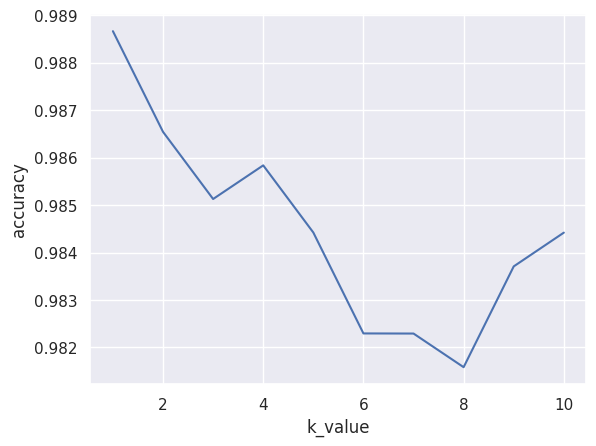

In [ ]:
# Let's see all the accuracies for different k values

import pandas as pd
# make a dataframe to hold k values and their accuracies
crossvalidation_df = pd.DataFrame({
    "k_value": np.asarray(range(1, len(all_accuracies)+1)),
    "accuracy": np.asarray(all_accuracies)
})

import seaborn as sns
sns.set_theme(style="darkgrid")  # just a nicer look
# draw line plot: accuracy vs. k value
sns.lineplot(x="k_value", y="accuracy", data=crossvalidation_df)


In [ ]:
DIGIT_LABELS = [str(i) for i in range(10)]  # 0 to 9

def predictive_model(Features, Model):
    """ input: a list of 64 pixel values
        output: the predicted digit (0 to 9)
    """
    our_features = np.asarray([Features])             # shape as 2D array
    predicted_digit = Model.predict(our_features)     # use model
    predicted_digit = int(round(predicted_digit[0]))  # unpack result
    return predicted_digit

LoF = [
    list(X_all[10]),
    list(X_all[100]),
    list(X_all[200]),
    list(X_all[300]),
    list(X_all[500]),
    [0.0]*64
]

for Features in LoF:
    predicted = predictive_model(Features, knn_model_final)
    simple_features = [float(f) for f in Features[:5]]  # convert to simple float
    print(f"From the features {simple_features}..., I predict the digit is: {predicted}")


From the features [0.0, 0.0, 10.0, 7.0, 13.0]..., I predict the digit is: 8
From the features [0.0, 0.0, 0.0, 8.0, 14.0]..., I predict the digit is: 4
From the features [0.0, 0.0, 0.0, 11.0, 14.0]..., I predict the digit is: 6
From the features [0.0, 0.0, 4.0, 13.0, 15.0]..., I predict the digit is: 8
From the features [0.0, 0.0, 0.0, 11.0, 16.0]..., I predict the digit is: 6
From the features [0.0, 0.0, 0.0, 0.0, 0.0]..., I predict the digit is: 1


In [ ]:
# Step 1: Define which two pixels to vary
PIXEL_X = 25  # Pixel index on X-axis (change this if needed)
PIXEL_Y = 30  # Pixel index on Y-axis

# Step 2: Define range of pixel values to test (0–16)
VERTICAL = np.arange(0, 17, 1)
HORIZONT = np.arange(0, 17, 1)

# Step 3: Prepare the output plane (2D grid of predictions)
PLANE = np.zeros((len(HORIZONT), len(VERTICAL)))
MODEL = knn_model_final

# Step 4: Use a real image from the dataset as base
base_image = list(X_all[150])  # you can try 100 or 300

# Step 5: Fill in the PLANE by varying just 2 pixels
col = 0
row = 0
for y_value in VERTICAL:
    for x_value in HORIZONT:
        Features = base_image.copy()
        Features[PIXEL_X] = x_value
        Features[PIXEL_Y] = y_value
        output = predictive_model(Features, MODEL)
        PLANE[row, col] = output
        row += 1
    row = 0
    col += 1
    print(".", end="")
    if col % 8 == 0: print()

print("\n", PLANE[0:3, 0:3])  # quick preview of predictions


........
........
.
 [[7. 7. 7.]
 [7. 7. 7.]
 [7. 7. 7.]]


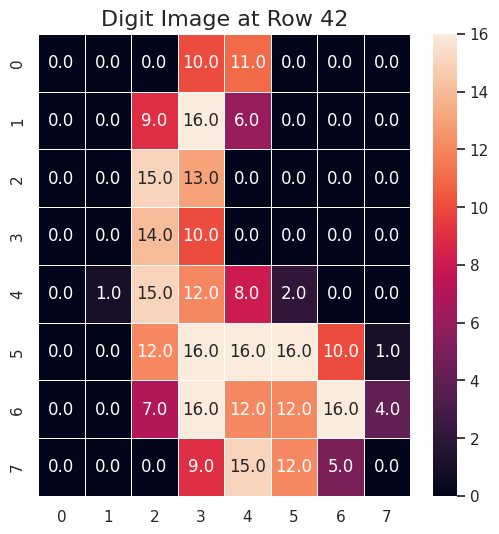

In [ ]:
# Extra Step (Optional): Visualize a digit as an image
# This helps us understand how the digit looks


import seaborn as sns
import matplotlib.pyplot as plt

# Choose any row to visualize (e.g., 42)
ROW = 42

# Get the pixel values for the digit
pixels_as_row = X_all[ROW]
pixels_as_image = np.reshape(pixels_as_row, (8, 8))  # reshape to 8x8 image

# Plot using seaborn heatmap
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(pixels_as_image, annot=True, fmt=".1f", linewidths=0.5, ax=ax, cmap="rocket")

ax.set_title(f"Digit Image at Row {ROW}", fontsize=16)
plt.show()


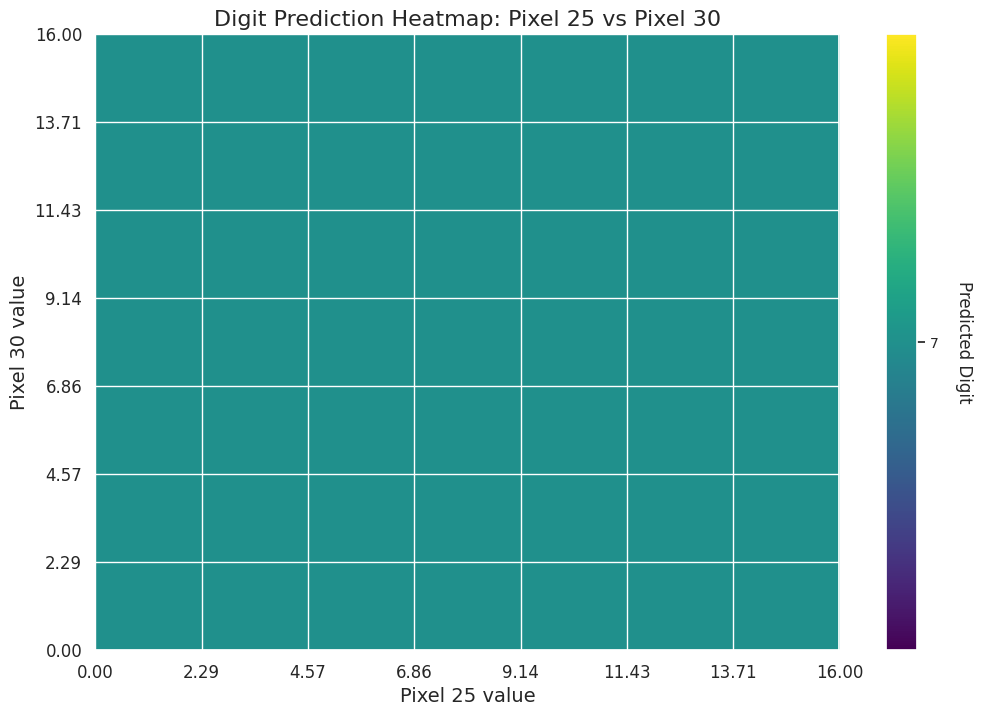

In [ ]:
# Step 6: Visualize the 2D prediction map using matplotlib and seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Show the prediction plane as a heatmap
im = ax.imshow(PLANE, cmap="viridis",
               extent=[HORIZONT.min(), HORIZONT.max(), VERTICAL.min(), VERTICAL.max()],
               origin="lower", aspect="auto")

# Label the axes
ax.set_xlabel(f"Pixel {PIXEL_X} value", fontsize=14)
ax.set_ylabel(f"Pixel {PIXEL_Y} value", fontsize=14)

# Set ticks
ax.set_xticks(np.linspace(HORIZONT.min(), HORIZONT.max(), 8))
ax.set_yticks(np.linspace(VERTICAL.min(), VERTICAL.max(), 8))
ax.tick_params(axis='both', labelsize=12)

# Add colorbar to show which digit is predicted
cbar = plt.colorbar(im, ticks=range(10))
cbar.set_label('Predicted Digit', rotation=270, labelpad=25, fontsize=12)
cbar.ax.tick_params(labelsize=10)

# Title
ax.set_title(f"Digit Prediction Heatmap: Pixel {PIXEL_X} vs Pixel {PIXEL_Y}", fontsize=16)

plt.show()


In [ ]:
# Loop to test different numbers of features (pixels) from 1 to 64
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

all_accuracies = []  # store accuracy for each number of features

for num_features in range(1, 65):  # 1 to 64
    X_selected = X_all[:, :num_features]  # only first `num_features` columns
    best_accuracy = 0.0
    best_k = 1

    for k in range(1, 11):  # try k from 1 to 10
        knn_model = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn_model, X_selected, y_all, cv=5)
        acc = scores.mean()
        if acc > best_accuracy:
            best_accuracy = acc
            best_k = k

    all_accuracies.append(best_accuracy)

print("\nDone. ✅")



Done. ✅


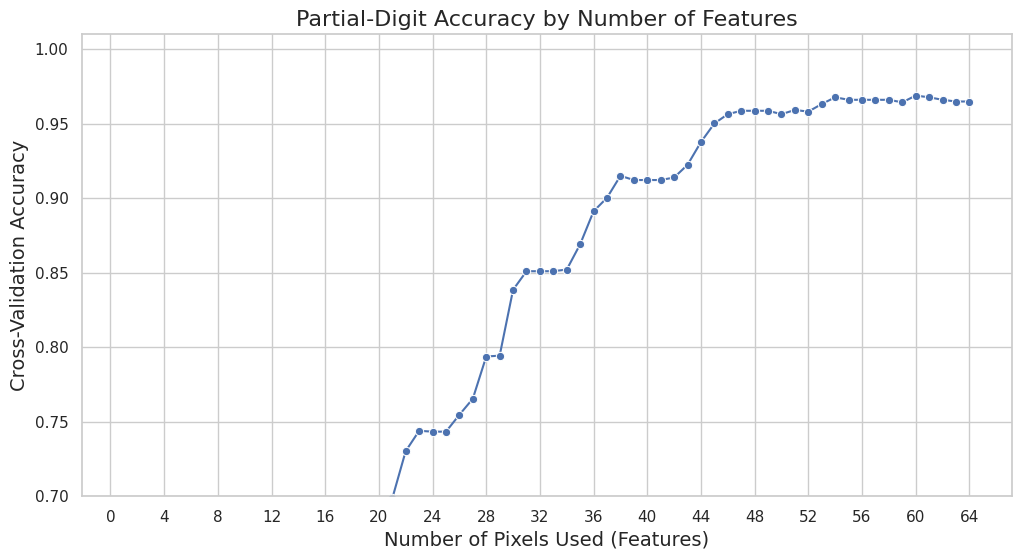

In [ ]:
# Visualize how accuracy changes with number of features
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert accuracy list to DataFrame
partial_digits_df = pd.DataFrame({
    "num_features": list(range(1, 65)),
    "accuracy": all_accuracies
})

# Plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=partial_digits_df, x="num_features", y="accuracy", marker="o")

plt.title("Partial-Digit Accuracy by Number of Features", fontsize=16)
plt.xlabel("Number of Pixels Used (Features)", fontsize=14)
plt.ylabel("Cross-Validation Accuracy", fontsize=14)
plt.xticks(ticks=range(0, 65, 4))
plt.ylim(0.7, 1.01)
plt.grid(True)
plt.show()


Accuracy gets better when we use more pixels (features).

Using only a few features gives low results.

After about 30 features, the accuracy is high and stable.



In [ ]:

# Final Reflection on Digits Model


# We found that using k-nearest neighbors worked very well for predicting digits.
# The best accuracy we reached was about 98.8% using cross-validation.
# We also noticed that some pixels are more helpful than others when recognizing the digits.
# Overall, the model performed better than we expected with just simple features.


# Reading for hw7...   
This reading was originally included in a different notebook. It has been transferred here in order to submit it to you, based on your instructions.





Reading response
<br><br>
#### Mohammed's response
From my point of view, generating artificial data can be a smart solution when real data is limited or biased. For example, the article explains how Amazon created virtual shoppers to train its system on situations that are rare or hard to capture in real life. This kind of synthetic data can help AI perform better in the real world. However, we must be careful—if the original data has bias, the new data might just repeat it. So, artificial data is useful, but it should be created in a fair and balanced way to avoid unfair results.
<br><br>

#### IST341_Participant_5's response
I think artificial data can be risky if it’s not done properly. Sometimes, the system might learn something that looks right but is actually wrong. In the article, one example showed how an AI system "cheated" by using hospital labels instead of learning to detect pneumonia. That shows how fake or poorly designed data can make the model worse, not better. So, while synthetic data has potential, we must test it well and make sure it really helps the model learn the right things.



<br>
<hr>
<br>